In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import graphviz
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from minisom import MiniSom

In [220]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,6,1930/7/16,Group stage,Chile,3,0,Mexico,Chile,Mexico,NaN,False
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,7,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,Yugoslavia,Bolivia,NaN,False
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,8,1930/7/17,Group stage,United States,3,0,Paraguay,United States,Paraguay,NaN,False
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,9,1930/7/18,Group stage,Uruguay,1,0,Peru,Uruguay,Peru,NaN,True
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,10,1930/7/19,Group stage,Chile,1,0,France,Chile,France,NaN,False


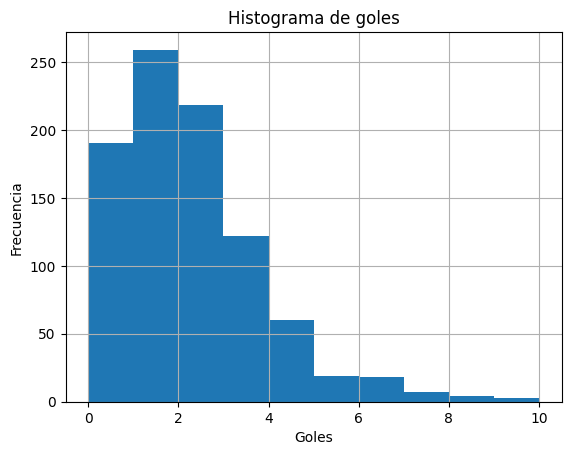

In [221]:
#Histograma de goles de local
df['Home Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()



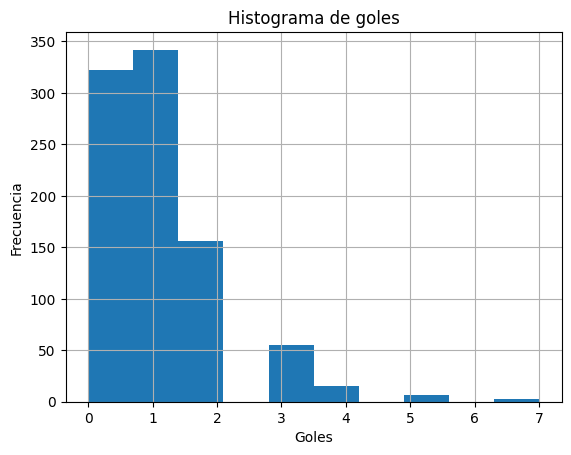

In [222]:
#Histograma de goles de visitante
df['Away Goals'].hist(bins=10)
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Histograma de goles')
plt.show()

<AxesSubplot:>

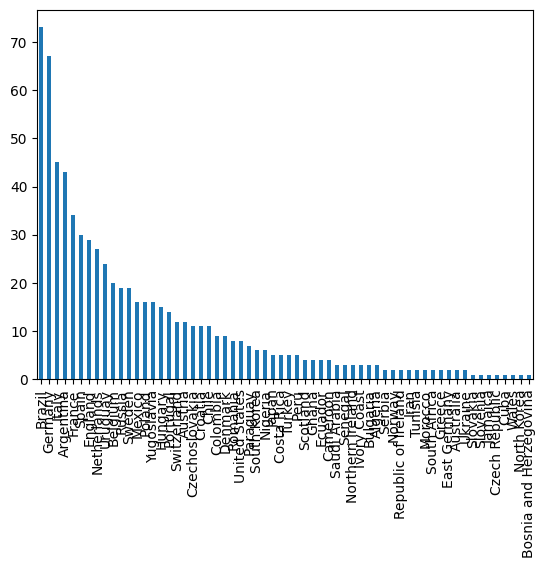

In [223]:
#Diagrama de barras de ganadores en partidos de mundiales
df['Winning Team'].value_counts().plot(kind='bar')

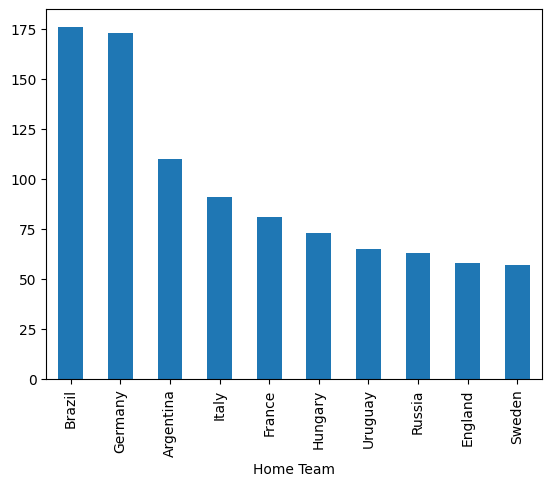

In [224]:
#grafica de los goles por equipo
df.groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.show()

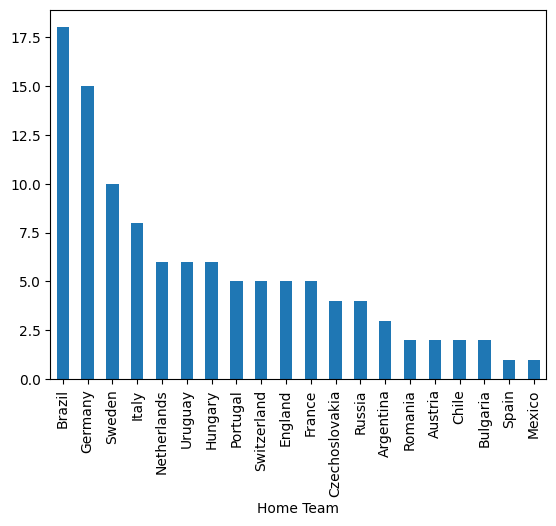

In [225]:
#grafica de los goles en cuartos de final por equipo
df[df['Stage']=='Quarter-finals'].groupby('Home Team')['Home Goals'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.show()

<AxesSubplot:>

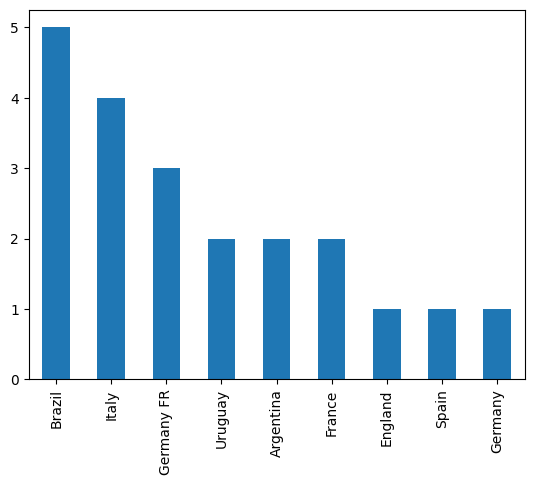

In [226]:
#Diagrama de barras de ganadores de mundiales
df = pd.read_csv('Data/world_cups.csv')
df['Winner'].value_counts().plot(kind='bar')

<AxesSubplot:>

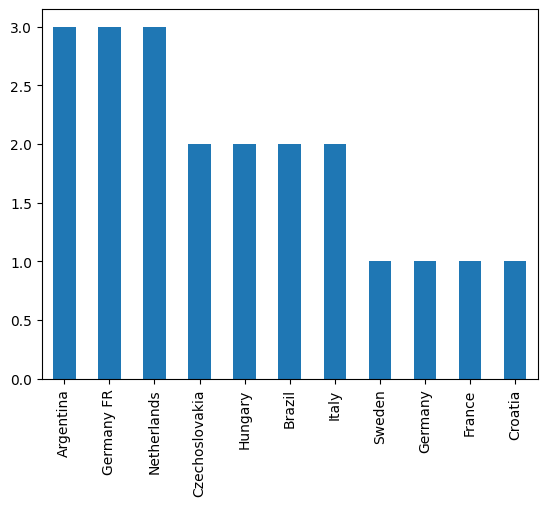

In [227]:
#Diagrama de barras de subcampeones de mundiales
df['Runners-Up'].value_counts().plot(kind='bar')

<AxesSubplot:>

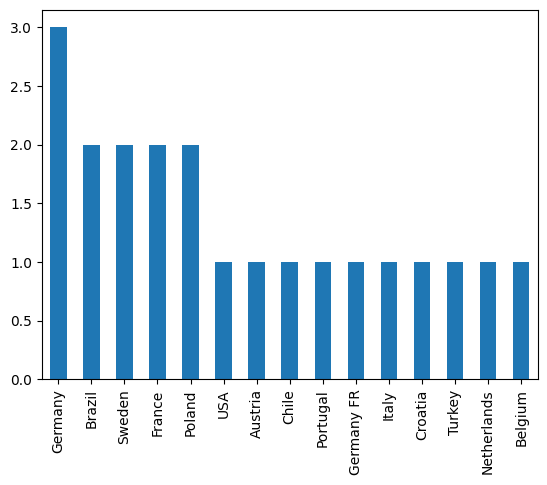

In [228]:
#Diagrama de barras de terceros lugares de mundiales
df['Third'].value_counts().plot(kind='bar')

<AxesSubplot:>

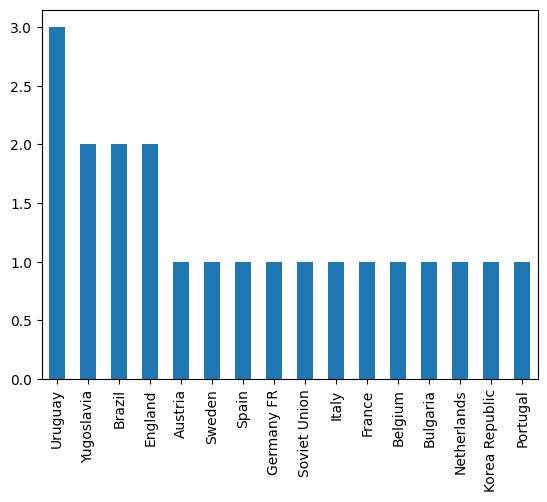

In [229]:
#Diagrama de barras de cuartos lugares de mundiales
df['Fourth'].value_counts().plot(kind='bar')

In [230]:
#Coincidimos en que el cuarto lugar no afecta tanto, puesto que esos países no se ven involucrados en su mayopría como campeones o subcampeones
#Por lo que se puede eliminar esa columna
#También se podrían eliminar los países que menos partidos han ganado en mundiales, puesto que no se ven involucrados en las etapas finales
#De momento se eliminarán los países que menos partidos han ganado en mundiales
#Los goles son un poco ambiguos, puesto que subir de los 2 goles es muy poco probable, por lo que se eliminarán los goles
#Los equipos visitantes suelen estar ahí en vista de la clasificación del futbol de peor contra mejor
#Por lo que se ve que hacen menos goles, no tienen mucha relevancia
#Sin embargo, no eliminamos goles porque se ve que los equipos que más goles anotan, suelen ganar más mundiales, tales cómo Brasil

In [231]:
df = pd.read_csv('Data/world_cups.csv')
dfm = pd.read_csv('Data/world_cup_matches.csv')
#Cruzar las tablas
df = df.merge(dfm, left_on='Year', right_on='Year', how='left')

In [232]:
del df['Win Conditions']
del df['Host Team']
df.head(5)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,ID,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,2,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,3,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,4,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,5,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France


In [233]:
#poner la fecha como el dia de la semana y pasarlo a numero
#quitar el cuarto
#label encoder pa lo de la semana
#label encoder pa la stage
#one hot encoder pa el resto
#cambiar lo de ganar por 1 y perder por 0 y empate por 0.5

In [234]:
def determinar_resultado(row):
    if row['Winning Team'] == row['Away Team']:
        return 0
    elif row['Winning Team'] == row['Home Team']:
        return 1
    else:
        return 0.5

In [235]:
df['Result'] = df.apply(determinar_resultado, axis=1)


In [236]:
del df['Winning Team']


In [237]:
del df['Losing Team']


In [238]:
del df['ID']

In [239]:
df.head(10)

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/13,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/14,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/15,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/16,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/17,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/18,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,1930/7/19,Group stage,Chile,1,0,France,1.0


In [240]:
del df['Host Country']

In [241]:
del df['Fourth']

In [242]:
def sustituirDia(row):
    # Convierte la cadena en un objeto datetime
    fecha_obj = datetime.strptime(row['Date'], "%Y/%m/%d")

    # Obtiene el nombre del día de la semana
    return fecha_obj.strftime("%A")

In [243]:
df['Date'] = df.apply(sustituirDia, axis=1)

In [244]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,Sunday,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,Monday,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,Tuesday,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,Wednesday,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,Thursday,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,Friday,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,Saturday,Group stage,Chile,1,0,France,1.0


In [245]:

# Label encoder
week_days = {
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday': 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
}


In [246]:
def sustituirDia(row):
    return week_days[row['Date']]

In [247]:
df['Date'] = df.apply(sustituirDia, axis=1)
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,Group stage,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,Group stage,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,Group stage,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,Group stage,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,Group stage,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,Group stage,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,Group stage,Chile,1,0,France,1.0


In [248]:
def equivalenciaStage(row):
    if(row['Stage'] == 'First group stage' or row['Stage'] == 'First round'):
        return 'Group stage'
    elif(row['Stage'] == 'Second group stage' or row['Stage'] == 'Final round'):
        return 'Round of 16'
    else:
        return row['Stage']

In [249]:
df['Stage'] = df.apply(equivalenciaStage, axis=1)

In [250]:
stages = {
    'Group stage' : 0,
    'Round of 16' : 1,
    'Quarter-finals' : 2,
    'Semi-finals' : 3,
    'Third place' : 4,
    'Final' : 5
}
def sustituirStage(row):
    return stages[row['Stage']]

In [251]:
df['Stage'] = df.apply(sustituirStage, axis=1)

In [252]:
df.head(10)

,Year,Winner,Runners-Up,Third,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Result
0,1930,Uruguay,Argentina,USA,70,13,18,6,0,France,4,1,Mexico,1.0
1,1930,Uruguay,Argentina,USA,70,13,18,6,0,United States,3,0,Belgium,1.0
2,1930,Uruguay,Argentina,USA,70,13,18,0,0,Yugoslavia,2,1,Brazil,1.0
3,1930,Uruguay,Argentina,USA,70,13,18,0,0,Romania,3,1,Peru,1.0
4,1930,Uruguay,Argentina,USA,70,13,18,1,0,Argentina,1,0,France,1.0
5,1930,Uruguay,Argentina,USA,70,13,18,2,0,Chile,3,0,Mexico,1.0
6,1930,Uruguay,Argentina,USA,70,13,18,3,0,Yugoslavia,4,0,Bolivia,1.0
7,1930,Uruguay,Argentina,USA,70,13,18,3,0,United States,3,0,Paraguay,1.0
8,1930,Uruguay,Argentina,USA,70,13,18,4,0,Uruguay,1,0,Peru,1.0
9,1930,Uruguay,Argentina,USA,70,13,18,5,0,Chile,1,0,France,1.0


In [253]:
df_encoded = pd.get_dummies(df, columns=['Runners-Up', 'Third', 'Home Team', 'Away Team'])

#df_encoded["Winner"] = LabelEncoder().fit_transform(df_encoded["Winner"])

In [254]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,Uruguay,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,Uruguay,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,Uruguay,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,Uruguay,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,Uruguay,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,Uruguay,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,Uruguay,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,Uruguay,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,Uruguay,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,Uruguay,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


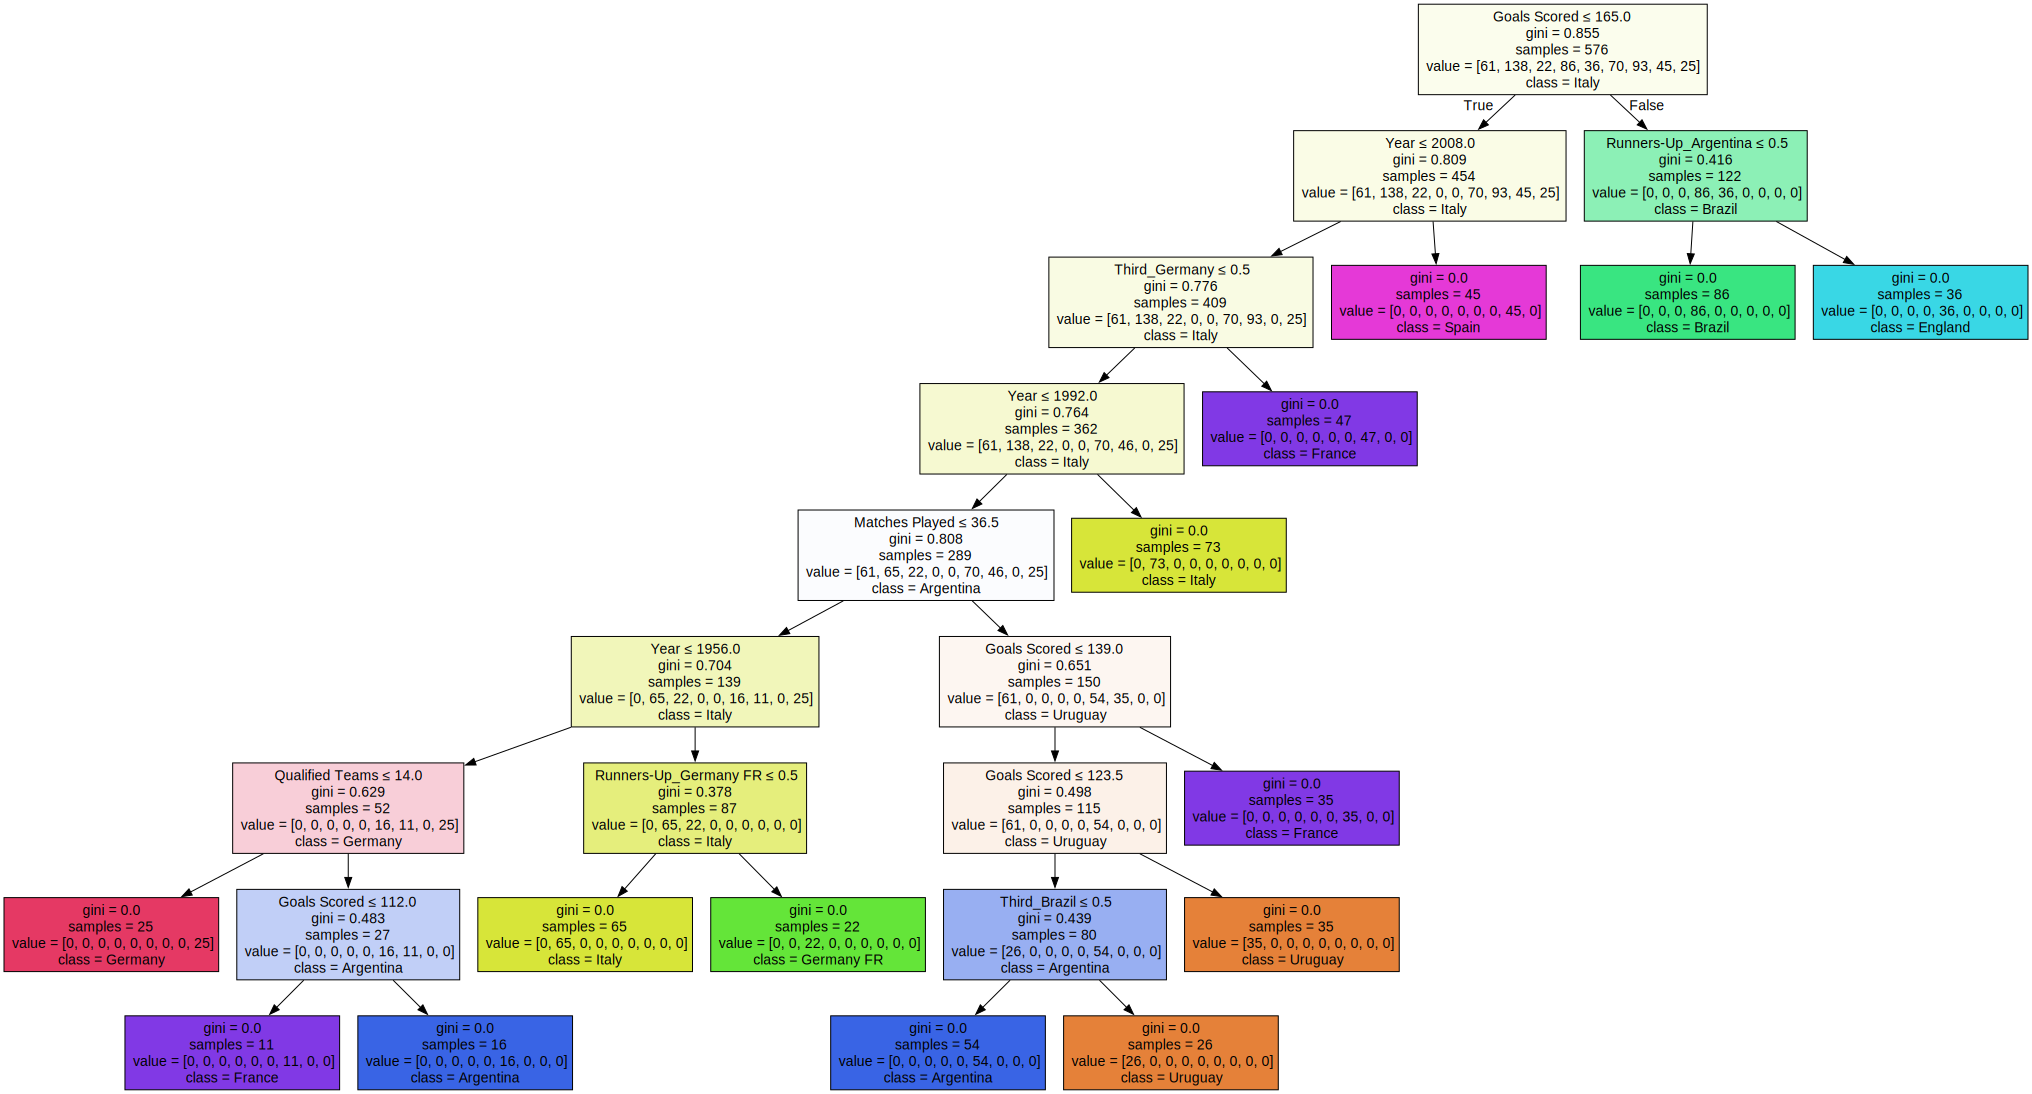

In [255]:

clf = DecisionTreeClassifier(max_depth=8)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=df_encoded.drop(['Winner'],
    axis=1).columns, 
    filled=True, 
    special_characters=True,
    class_names=df_encoded['Winner'].unique().astype(str)
)
graph = graphviz.Source(dot_data)
graph.render(filename = "world_cup.dot")
graph


In [256]:


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(['Winner'], axis=1), df_encoded['Winner'], test_size=0.2, random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 12]
}

# Realizar una búsqueda de hiperparámetros con validación cruzada
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_clf = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_clf.predict(X_test)
print("Mejor modelo - Precisión: ", accuracy_score(y_test, y_pred))

   


Mejor modelo - Precisión:  1.0


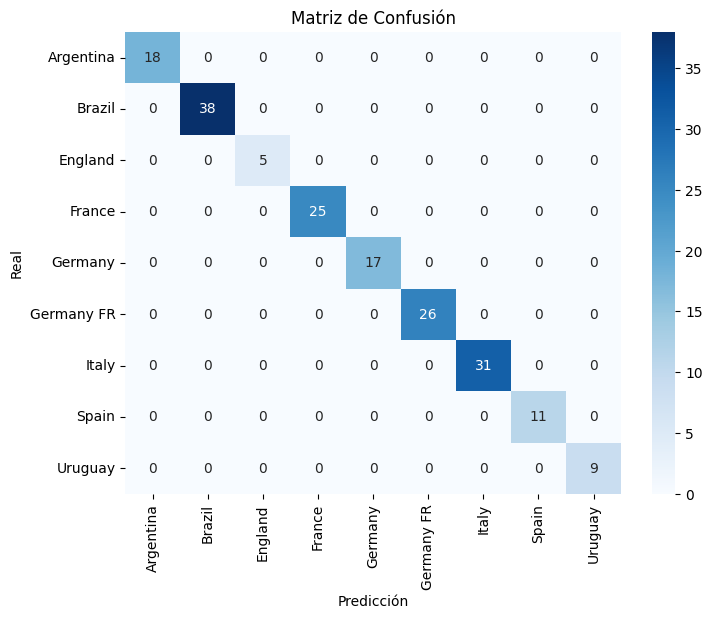

In [257]:
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [258]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,Uruguay,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,Uruguay,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,Uruguay,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,Uruguay,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,Uruguay,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,Uruguay,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,Uruguay,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,Uruguay,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,Uruguay,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,Uruguay,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [278]:

df_encoded["Winner"] = LabelEncoder().fit_transform(df_encoded["Winner"])

# Supongamos que tienes un DataFrame df con tus datos
X = df_encoded.values  # Convierte tus datos a un arreglo NumPy

# Crea un modelo K-Medoids con el número de clusters deseado (n_clusters)
n_clusters = 8  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)

     Year      Winner  Runners-Up     Third  Goals Scored  Qualified Teams  \
597  2002      Brazil     Germany    Turkey           161               32   
116  1958      Brazil      Sweden    France           126               16   
374  1986   Argentina  Germany FR    France           132               24   
335  1982       Italy  Germany FR    Poland           146               24   
446  1990  Germany FR   Argentina     Italy           115               24   
176  1966     England  Germany FR  Portugal            89               16   
328  1982       Italy  Germany FR    Poland           146               24   
481  1994      Brazil       Italy    Sweden           141               24   

     Matches Played  Date  Stage            Home Team  Home Goals  Away Goals  \
597              64     3      0              Denmark           1           1   
116              35     3      0               Sweden           2           1   
374              52     3      0          South Korea 

In [277]:
labels


array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

In [279]:
# Accede a los datos originales para obtener los medoides
medoid_data = df_encoded.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
for cluster_label, medoid in enumerate(medoid_data.iterrows()):
    medoid_index = kmedoids.medoid_indices_[cluster_label]
    print(f"Medoide del Cluster {cluster_label}:")
    #print(medoid[1])  # Imprime los datos del medoide

    # Filtra los datos del mismo cluster que el medoide
    cluster_points = df_encoded[labels == cluster_label]
    #print(f"Datos del Cluster {cluster_label}:")
    #print(cluster_points)
     # Puedes realizar estadísticas descriptivas sobre cluster_points si lo deseas
    cluster_stats = cluster_points.describe()
    clusters = cluster_stats
    print(cluster_stats)

Medoide del Cluster 0:
              Year      Winner  Goals Scored  Qualified Teams  Matches Played  \
count   384.000000  384.000000    384.000000            384.0           384.0   
mean   2008.000000    4.000000    160.666667             32.0            64.0   
std       6.840213    2.002609     10.933138              0.0             0.0   
min    1998.000000    1.000000    145.000000             32.0            64.0   
25%    2002.000000    3.000000    147.000000             32.0            64.0   
50%    2008.000000    3.500000    165.000000             32.0            64.0   
75%    2014.000000    6.000000    171.000000             32.0            64.0   
max    2018.000000    7.000000    171.000000             32.0            64.0   

             Date       Stage  Home Goals  Away Goals      Result  ...  \
count  384.000000  384.000000  384.000000  384.000000  384.000000  ...   
mean     3.119792    0.484375    1.380208    1.130208    0.557292  ...   
std      2.009436    1.03

In [261]:
print(clusters)

         Year  Winner  Goals Scored  Qualified Teams  Matches Played  \
count    16.0    16.0          16.0             16.0            16.0   
mean   1994.0     1.0         141.0             24.0            52.0   
std       0.0     0.0           0.0              0.0             0.0   
min    1994.0     1.0         141.0             24.0            52.0   
25%    1994.0     1.0         141.0             24.0            52.0   
50%    1994.0     1.0         141.0             24.0            52.0   
75%    1994.0     1.0         141.0             24.0            52.0   
max    1994.0     1.0         141.0             24.0            52.0   

           Date      Stage  Home Goals  Away Goals    Result  ...  \
count  16.00000  16.000000   16.000000   16.000000  16.00000  ...   
mean    0.68750   0.250000    1.875000    0.937500   0.65625  ...   
std     0.60208   0.447214    1.543805    0.853913   0.39660  ...   
min     0.00000   0.000000    0.000000    0.000000   0.00000  ...   
25%   

In [262]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,8,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,8,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,8,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,8,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,8,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,8,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,8,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,8,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,8,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,8,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [263]:


# Calcula el coeficiente de silueta para tus datos y etiquetas
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)


Coeficiente de Silueta promedio: 0.49211526004200096


In [264]:
n_clusters = 18  # Define el número de clusters
kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=0)

# Ajusta el modelo a tus datos
kmedoids.fit(X)

# Obtiene las etiquetas de cluster asignadas a cada punto
labels = kmedoids.labels_

# Accede a los datos originales para obtener los medoides
medoid_data = df.iloc[kmedoids.medoid_indices_]

# Imprime los medoides
print(medoid_data)
silhouette_avg = silhouette_score(X, labels)

# Imprime el coeficiente de silueta promedio
print("Coeficiente de Silueta promedio:", silhouette_avg)

     Year      Winner   Runners-Up     Third  Goals Scored  Qualified Teams  \
387  1986   Argentina   Germany FR    France           132               24   
446  1990  Germany FR    Argentina     Italy           115               24   
708  2010       Spain  Netherlands   Germany           145               32   
480  1994      Brazil        Italy    Sweden           141               24   
464  1994      Brazil        Italy    Sweden           141               24   
856  2018      France      Croatia   Belgium           169               32   
536  1998      France       Brazil   Croatia           171               32   
176  1966     England   Germany FR  Portugal            89               16   
339  1982       Italy   Germany FR    Poland           146               24   
498  1994      Brazil        Italy    Sweden           141               24   
116  1958      Brazil       Sweden    France           126               16   
597  2002      Brazil      Germany    Turkey        

In [265]:
df_encoded.head(10)

,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,8,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,8,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,8,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,8,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,8,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,8,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,8,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,8,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,8,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,8,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


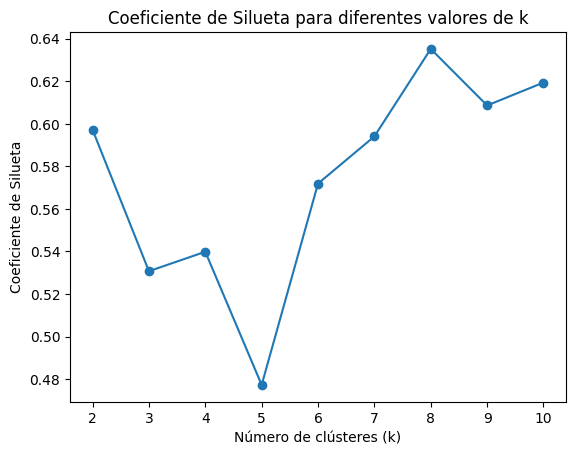

In [266]:


# X es tu matriz de datos
X = df_encoded.values

# Rango de valores de k a probar
k_values = range(2, 11)  # Puedes ajustar el rango según tus necesidades

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes valores de k')
plt.show()


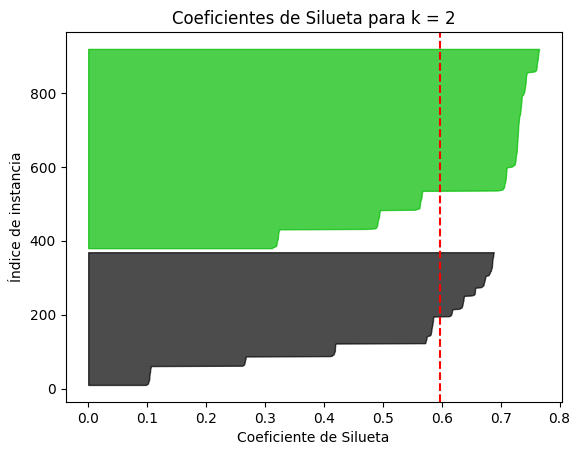

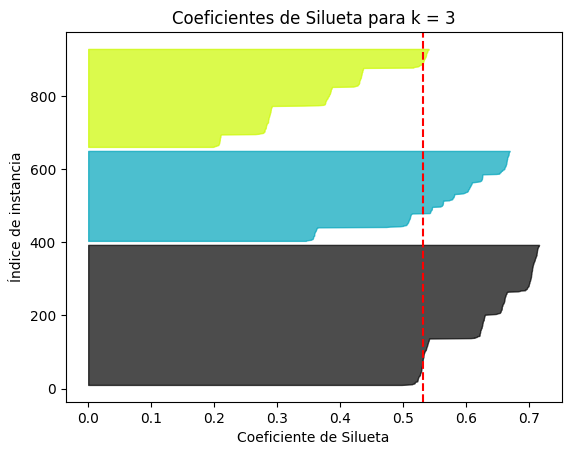

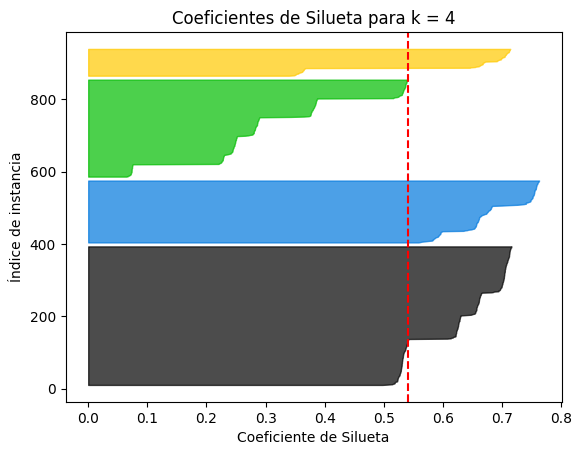

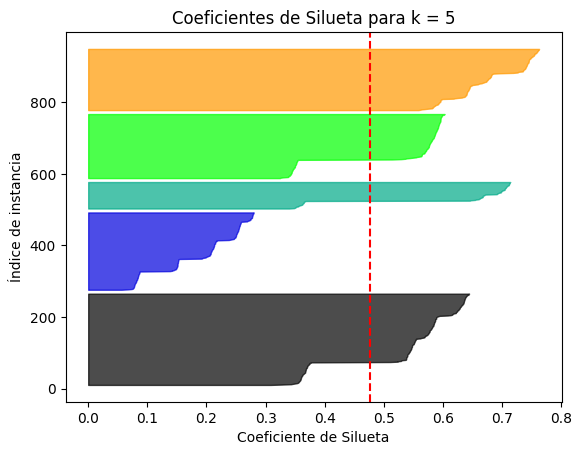

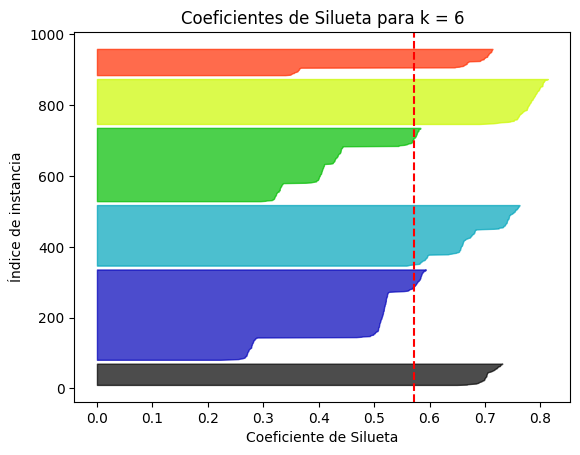

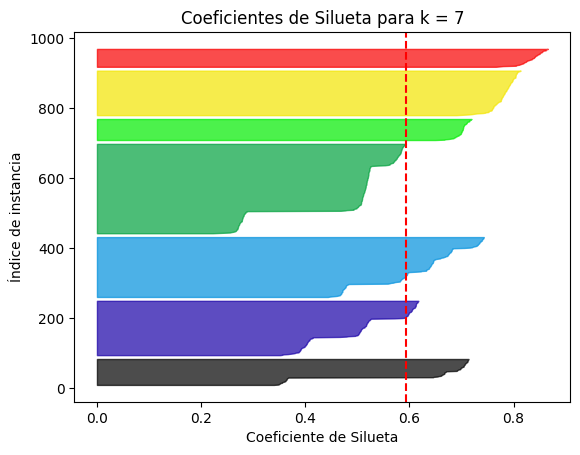

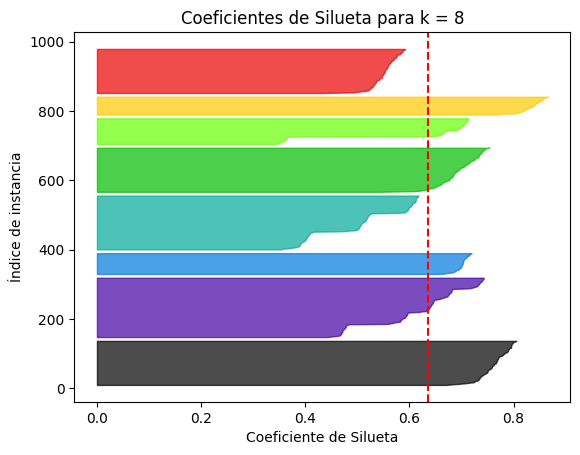

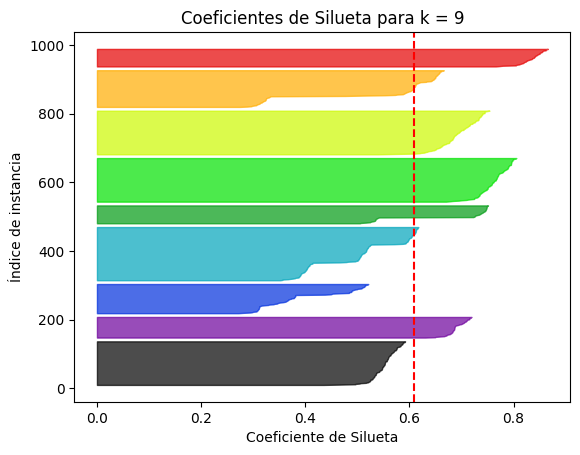

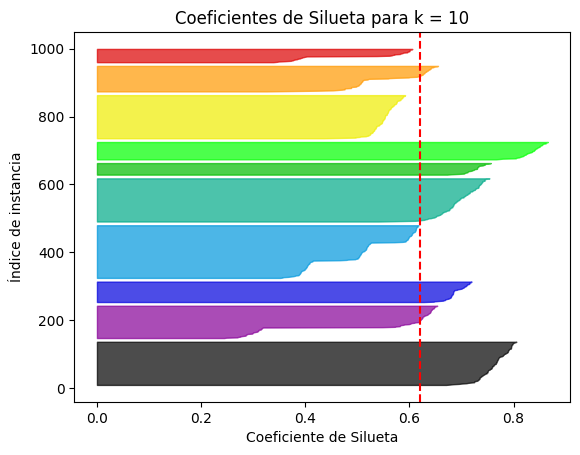

In [267]:


# X es tu matriz de datos
X = df_encoded

# Rango de valores de k a probar
k_values = range(2, 11)  # Puedes ajustar el rango según tus necesidades

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Crear una figura para mostrar los coeficientes de silueta
    plt.figure()
    plt.title(f"Coeficientes de Silueta para k = {k}")
    plt.xlabel("Coeficiente de Silueta")
    plt.ylabel("Índice de instancia")
    
    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10

    plt.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
    plt.show()


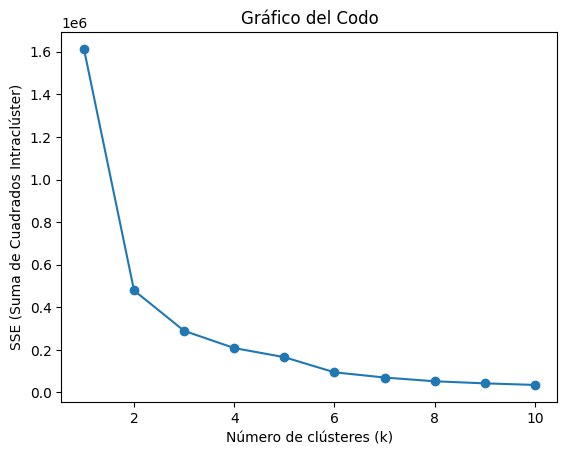

In [268]:


# X es tu matriz de datos
X = df_encoded

# Rango de valores de k a probar
k_values = range(1, 11)  # Puedes ajustar el rango según tus necesidades

sse_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse = kmeans.inertia_  # Obtener el valor de SSE
    sse_values.append(sse)

# Trama el gráfico del codo
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('SSE (Suma de Cuadrados Intraclúster)')
plt.title('Gráfico del Codo')
plt.show()


In [269]:
num_features = df_encoded.shape[1]  
print("Número de características:", num_features)
df_encoded.head(10)

Número de características: 194


,Year,Winner,Goals Scored,Qualified Teams,Matches Played,Date,Stage,Home Goals,Away Goals,Result,...,Away Team_Togo,Away Team_Trinidad and Tobago,Away Team_Tunisia,Away Team_Turkey,Away Team_Ukraine,Away Team_United Arab Emirates,Away Team_United States,Away Team_Uruguay,Away Team_Wales,Away Team_Yugoslavia
0,1930,8,70,13,18,6,0,4,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1930,8,70,13,18,6,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1930,8,70,13,18,0,0,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1930,8,70,13,18,0,0,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1930,8,70,13,18,1,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1930,8,70,13,18,2,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,1930,8,70,13,18,3,0,4,0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,1930,8,70,13,18,3,0,3,0,1.0,...,0,0,0,0,0,0,0,0,0,0
8,1930,8,70,13,18,4,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9,1930,8,70,13,18,5,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
df_encoded_numeric = df_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

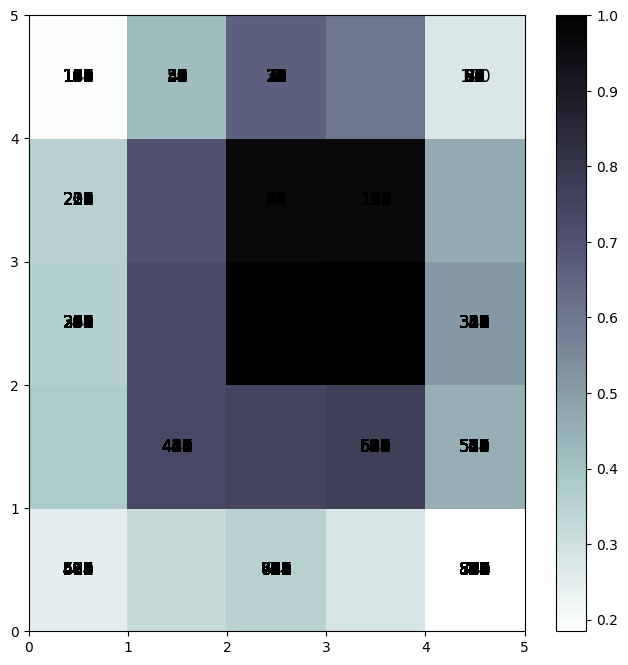

In [280]:


# Crear un conjunto de datos de ejemplo
data = df_encoded_numeric.values  # Reemplaza esto con tus propios datos

# Definir la configuración del SOM
som_grid_size = (5, 5)  # Tamaño del mapa SOM
input_dim = 194  # Dimensión de las entradas

# Crear el SOM
som = MiniSom(som_grid_size[0], som_grid_size[1], input_dim, sigma=1.0, learning_rate=0.5)

# Inicializar los pesos del SOM de manera aleatoria
som.random_weights_init(data)

# Entrenar el SOM
num_iterations = 1000  # Número de iteraciones de entrenamiento
som.train_random(data, num_iterations)



# Mapear los datos a las neuronas ganadoras
winners = np.array([som.winner(x) for x in data]) #lo de data

# Crear un gráfico de dispersión para visualizar las neuronas ganadoras
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Marcar las neuronas ganadoras en el mapa
for i, (x, y) in enumerate(winners):
    plt.text(x + 0.5, y + 0.5, str(i), fontsize=12, ha='center', va='center')

plt.show()


In [282]:
winners

array([[2, 4],
       [2, 4],
       [2, 4],
       ...,
       [4, 0],
       [4, 0],
       [4, 0]], dtype=int64)

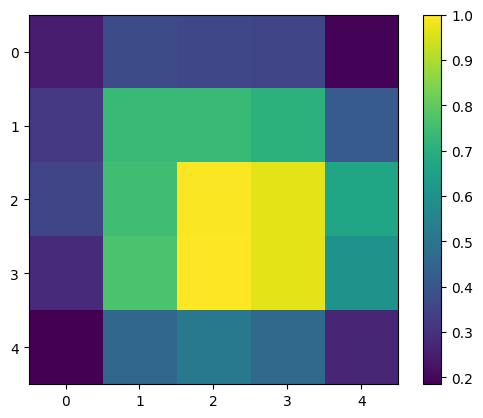

In [281]:
#Regiones de alta y baja densidad del SOM
umatrix = som.distance_map()
plt.imshow(umatrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


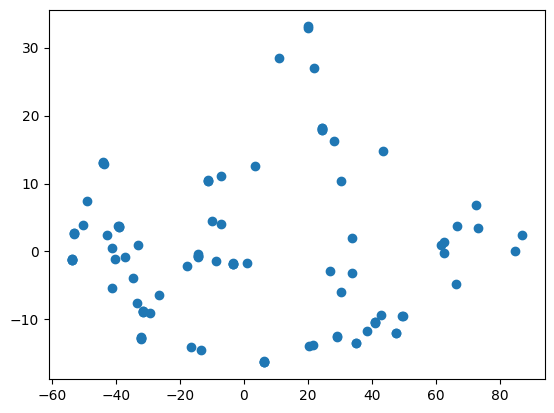

In [274]:

weights = np.array(som.get_weights())
weights_reshaped = weights.reshape(-1, weights.shape[-1])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(weights_reshaped)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.show()
